In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import math
%matplotlib inline

In [24]:
def Imagedetection(imagepath,numcards,epsilon=0.02):
    img = cv2.imread(imagepath)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(1,1),1000)
    flag, thresh = cv2.threshold(blur, 120, 255, cv2.THRESH_BINARY)
    # Find contours
    image,contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea,reverse=True) 
    # Select long perimeters only
    perimeters = [cv2.arcLength(contours[i],True) for i in range(len(contours))]
    listindex=[i for i in range(numcards) if perimeters[i]>perimeters[0]/2]
    # Show image
    imgcont = img.copy()
    [cv2.drawContours(imgcont, [contours[i]], 0, (0,255,0), 5) for i in listindex]
   
    warp = list(range(numcards))
    
    for i in range(numcards):
        card = contours[i]
        peri = cv2.arcLength(card,True)
        approx = cv2.approxPolyDP(card,epsilon*peri,True)
        rect = cv2.minAreaRect(contours[i])
        r = cv2.boxPoints(rect)

        h = np.float32([[0,0],[399,0],[399,399],[0,399]])
        approx = np.float32([item for sublist in approx for item in sublist])
        print(approx.shape)
        transform = cv2.getPerspectiveTransform(approx,h)
        warp[i] = cv2.warpPerspective(img,transform,(400,400))

    # Show perspective correction
    
    fig = plt.figure(1, (10,10))
    grid = ImageGrid(fig, 111, # similar to subplot(111)
                    nrows_ncols = (4, 4), # creates 2x2 grid of axes
                    axes_pad=0.1, # pad between axes in inch.
                    aspect=True, # do not force aspect='equal'
                    )
    new_img_list = []
    for i in range(numcards):
        new_img = cv2.cvtColor(warp[i],cv2.COLOR_BGR2RGB)
        new_img_list.append(new_img)
        grid[i].imshow(warp[i])
        cv2.imwrite(f"Image{i}.jpg",warp[i])
    print("Cropping Complete! Let's roll!")

(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
Cropping Complete! Let's roll!


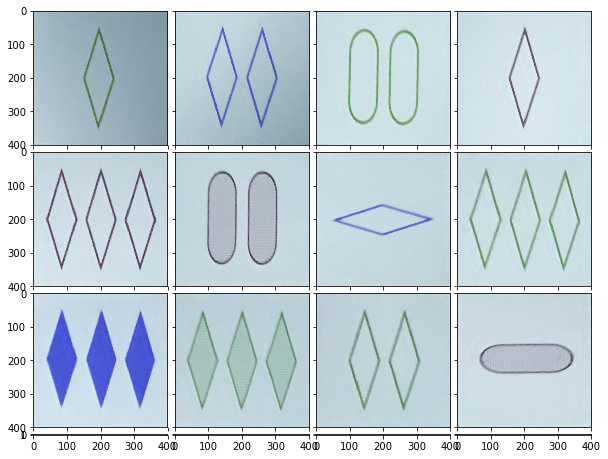

In [25]:
Imagedetection("IMG_1821.JPG",12)


In [9]:
len(new_img[0]) #number of matrix in each warp perspective same as the width pixel


400

In [12]:
new_img[0][0][0]

array([131, 124, 108], dtype=uint8)

In [ ]:
    warp = list(range(numcards))
    for i in range(numcards):
        card = contours[i]
        peri = cv2.arcLength(card,True)
        approx = cv2.approxPolyDP(card,0.04*peri,True)
        rect = cv2.minAreaRect(contours[i])
        r = cv2.boxPoints(rect)

        h = np.float32([[0,0],[399,0],[399,399],[0,399]])
        approx = np.float32([item for sublist in approx for item in sublist])
        print(approx)
        transform = cv2.getPerspectiveTransform(approx,h)
        warp[i] = cv2.warpPerspective(img,transform,(400,400))

    # Show perspective correction
    fig = plt.figure(1, (10,10))
    grid = ImageGrid(fig, 111, # similar to subplot(111)
                    nrows_ncols = (4, 4), # creates 2x2 grid of axes
                    axes_pad=0.1, # pad between axes in inch.
                    aspect=True, # do not force aspect='equal'
                    )

    for i in range(numcards):
        grid[i].imshow(warp[i]) # The AxesGrid object work as a list of axes.
        cv2.imwrite(f"test{i}.jpg", warp[i])